In [1]:
from qiskit import QuantumCircuit, IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()
API_TOKEN = os.environ.get("API_TOKEN")

IBMQ.enable_account(API_TOKEN)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# (bonus)

> There are many pseudorandom number sequence test program. You can test the random number you got to see whether they are really random or not. Why?

### Let's try and test the number generated by real-world quantum device is truely random!

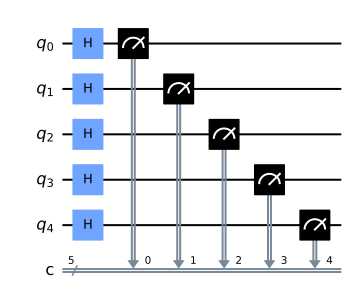

In [3]:
n = 5
qc = QuantumCircuit(n, n)

qc.h([i for i in range(n)])
qc.measure([i for i in range(n)], [i for i in range(n)])
    
qc.draw()

In [4]:
provider = IBMQ.get_provider('ibm-q')
devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= n
                            and not x.configuration().simulator
                            and x.status().operational==True
                            and x.name()!='ibmq_bogota')
backend = least_busy(devices)
print(backend)

ibmq_lima


In [5]:
job = execute(qc, backend, shots=8192, memory=True)
job_monitor(job)

Job Status: job has successfully run


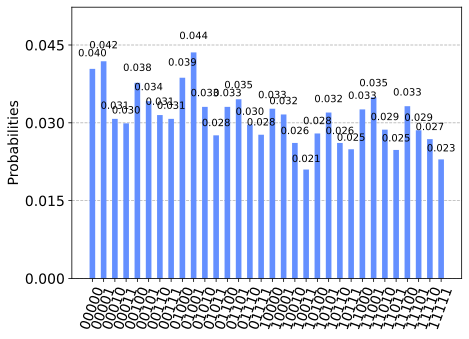

In [6]:
result = job.result()
memory = result.get_memory()
counts = result.get_counts()
plot_histogram(counts)

In [7]:
from datetime import datetime

f = open("RNG" + datetime.now().isoformat() + ".txt", "a")
for i in memory:
    f.write(chr(int(i, 2)))
f.close()

In [8]:
IBMQ.disable_account()

### Using ENT, a pseudorandom number sequence test program, let's look at the analysis of the random numbers generated above.

### 1. The freqency statistics

Just look at the histogram above. It's not quite balanced, is it? It doesn't seem to be really random.


### 2. Entropy
> Entropy = 4.979968 bits per byte.

The entropy is higher than the example given on the website, I guess it's random on this one.


### 3. Chi-square Test
> Chi square distribution for 8192 samples is 59184.12, and randomly would exceed this value less than 0.01 percent of the times.
>> "If the percentage is greater than 99% or less than 1%, the sequence is almost certainly not random. If the percentage is between 99% and 95% or between 1% and 5%, the sequence is suspect. Percentages between 90% and 95% and 5% and 10% indicate the sequence is 'almost suspect'."

Judging from this description, I guess our numbers are far from random. Though I do guess it has something to do with 5/8 bits.

### 4. Arithmetic Mean
> Arithmetic mean value of data bytes is 14.5867 (127.5 = random).
>> "If the data are close to random, this should be about 127.5."

But since the numbers we are generating is 5 bits instead of 8, the arithmetic mean should be about (2^5-1)/2 = 15.5. Thus, I guess our numbers are somewhat random.

### 5. Monte Carlo Value for Pi
Since this is a test for 8 bits data, let's skip this one.

### 6. Serial Correlation Coefficient
> Serial correlation coefficient is 0.002841 (totally uncorrelated = 0.0).
>> "For random sequences, this value (which can be positive or negative) will, of course, be close to zero."

So I guess our number is pretty much random.

### Conclusion: Randomness is *hard* to tell. (sad face)